In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import glob

plt.style.use('ggplot')
sns.set(font_scale=1.5)

In [53]:
#https://www.kaggle.com/datasets/siavashraz/bitcoin-perpetualbtcusdtp-limit-order-book-data

In [69]:
btc_trades_df = pd.concat([pd.read_csv(f) for f in glob.glob("../data/BTCUSDT-trades*.csv")], ignore_index=True)
btc_trades_df['receive_ts'] = pd.to_datetime(btc_trades_df['trade_time'], unit='ms')
btc_trades_df['exchange_ts'] = btc_trades_df['receive_ts']
btc_trades_df.rename(columns={'side': 'aggro_side'}, inplace=True)
btc_trades_df.drop(columns=["trade_id", "trade_time"], inplace=True)
btc_trades_df['aggro_side'] = btc_trades_df['aggro_side'].replace({'BUY': 'BID', "SELL": "ASK"})
btc_trades_df.sort_values(by=['exchange_ts'], inplace=True)

In [71]:
btc_trades_df.tail()

,trade_id,trade_time,price,size,aggro_side,receive_ts,exchange_ts
1265596,2058922017177604,1674259189167,22668.2,0.458579,BID,2023-01-20 23:59:49.167,2023-01-20 23:59:49.167
1265597,2058922018488321,1674259189174,22668.2,0.081589,BID,2023-01-20 23:59:49.174,2023-01-20 23:59:49.174
1265598,2058922096082945,1674259189551,22672.8,0.000265,ASK,2023-01-20 23:59:49.551,2023-01-20 23:59:49.551
1265599,2058922418913281,1674259191001,22672.9,0.031191,BID,2023-01-20 23:59:51.001,2023-01-20 23:59:51.001
1265600,2058924017205249,1674259197985,22672.8,0.101101,ASK,2023-01-20 23:59:57.985,2023-01-20 23:59:57.985


In [72]:
btc_lobs_df = pd.read_csv("../data/BTCUSDT-LOBS-2023-01-09-2023-01-20.csv")
btc_lobs_df = btc_lobs_df.set_index(btc_lobs_df.columns[0])
btc_lobs_df.index.names = ['']

In [73]:
btc_lobs_df.rename(columns={"%d" % i: "ask_price_%d" % (i-2) for i in range(2, 2, 20)}, inplace=True)
btc_lobs_df.rename(columns={"%d" % i: "bid_price_%d" % (i/2-1) for i in range(2, 22, 2)}, inplace=True)
btc_lobs_df.rename(columns={"%d" % (i+1): "bid_vol_%d" % (i/2-1) for i in range(2, 22, 2)}, inplace=True)
btc_lobs_df.rename(columns={"%d" % i: "ask_price_%d" % (i/2-11) for i in range(22, 42, 2)}, inplace=True)
btc_lobs_df.rename(columns={"%d" % (i+1): "ask_vol_%d" % (i/2-11) for i in range(22, 42, 2)}, inplace=True)
btc_lobs_df["receive_ts"] =pd.to_datetime(btc_lobs_df["1"])
btc_lobs_df["exchange_ts"] = btc_lobs_df["receive_ts"]
btc_lobs_df.sort_values(by=['exchange_ts'], inplace=True)
btc_lobs_df.drop(columns=["0", "1"], inplace=True)

In [74]:
btc_lobs_df.head()

,bid_price_0,bid_vol_0,bid_price_1,bid_vol_1,bid_price_2,bid_vol_2,bid_price_3,bid_vol_3,bid_price_4,bid_vol_4,...,ask_price_6,ask_vol_6,ask_price_7,ask_vol_7,ask_price_8,ask_vol_8,ask_price_9,ask_vol_9,receive_ts,exchange_ts
,,,,,,,,,,,,,,,,,,,,,
0,17181.6,23.371,17181.5,0.746,17181.4,5.428,17181.2,0.89,17181.1,3.787,...,17182.3,0.02,17182.4,6.692,17182.5,1.904,17182.6,2.546,2023-01-09 22:17:40,2023-01-09 22:17:40
1,17181.6,24.232,17181.5,0.694,17181.4,5.428,17181.2,0.89,17181.1,3.787,...,17182.3,0.02,17182.4,6.001,17182.5,1.869,17182.6,2.105,2023-01-09 22:17:41,2023-01-09 22:17:41
2,17181.6,24.403,17181.5,0.694,17181.4,5.428,17181.2,0.89,17181.1,3.787,...,17182.3,0.02,17182.4,6.012,17182.5,1.869,17182.6,2.713,2023-01-09 22:17:41,2023-01-09 22:17:41
3,17181.6,24.874,17181.5,0.694,17181.4,5.428,17181.2,0.89,17181.1,3.776,...,17182.3,0.02,17182.4,6.001,17182.5,2.570,17182.6,2.613,2023-01-09 22:17:41,2023-01-09 22:17:41
4,17181.6,24.403,17181.5,0.694,17181.4,5.428,17181.2,0.89,17181.1,3.776,...,17182.3,0.02,17182.4,6.001,17182.5,2.589,17182.6,2.591,2023-01-09 22:17:41,2023-01-09 22:17:41


In [75]:
for level_id in range(10):
    btc_lobs_df[f'spread_{level_id}'] = btc_lobs_df[f'ask_price_{level_id}'] - btc_lobs_df[f'bid_price_{level_id}']

In [76]:
def vizualize_level_by_tick(lobs_df, level_id, name, number_of_ticks=None):
    fig, axes = plt.subplots(2, figsize=(20, 10), sharex=True)
    
    fig.suptitle(f'{name}: {level_id} Level', fontsize=28, horizontalalignment='center')
    axes[0].set_title('Bid-Ask Dynamics', fontsize=23)
    axes[1].set_title('Bid-Ask Spread', fontsize=23)
    sns.lineplot(data=lobs_df[:number_of_ticks][[f'ask_price_{level_id}', f'bid_price_{level_id}']], ax=axes[0])
    sns.lineplot(data=lobs_df[:number_of_ticks][f'spread_{level_id}'], ax=axes[1])
    axes[1].set_ylabel(None)
    plt.xlabel('Ticks', fontsize=19)
    fig.text(0.03, 0.48, 'USDT', va='center', rotation='vertical', fontsize=19);

In [77]:
def vizualize_level_by_time(lobs_df, level_id, name, number_of_ticks=None, path_to_save=None):
    df_lavel = lobs_df[:number_of_ticks][['exchange_ts', 
                                          f'ask_price_{level_id}', f'bid_price_{level_id}',
                                          f'spread_{level_id}']]
    
    fig, axes = plt.subplots(2, figsize=(20, 10), sharex=True)
    fig.suptitle(f'{name}: {level_id} Level', fontsize=28, horizontalalignment='center')
    axes[0].set_title('Bid-Ask Dynamics', fontsize=23)
    axes[1].set_title('Bid-Ask Spread', fontsize=23)
    sns.lineplot(data=df_lavel.drop(columns=[f'spread_{level_id}']).melt(id_vars='exchange_ts'),
                                    x='exchange_ts', y='value', hue='variable', legend=False, ax=axes[0])
    axes[0].legend(loc='upper left', labels=['Ask Price', 'Bid Price'])
    sns.lineplot(x=df_lavel['exchange_ts'], y=df_lavel[f'spread_{level_id}'], ax=axes[1])
    axes[0].set_ylabel(None)
    axes[1].set_ylabel(None)
    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    for label in plt.gca().get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    plt.xlabel('Time', fontsize=19)
    fig.text(0.03, 0.48, 'USDT', va='center', rotation='vertical', fontsize=19);
    
    if path_to_save:
        fig.savefig(path_to_save)

<Axes: xlabel='receive_ts'>

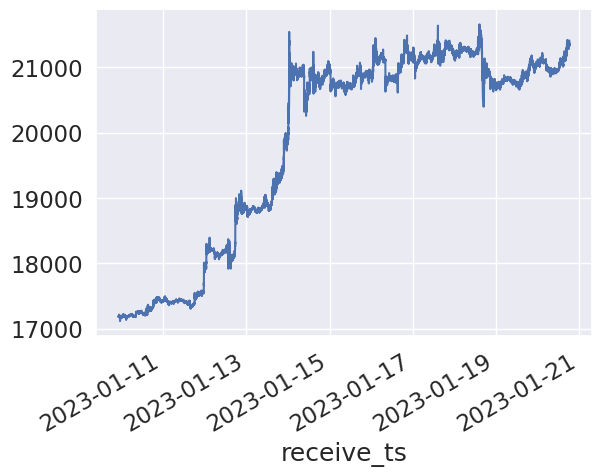

In [79]:
btc_lobs_df.set_index('receive_ts')['ask_price_0'].plot()

KeyboardInterrupt: 

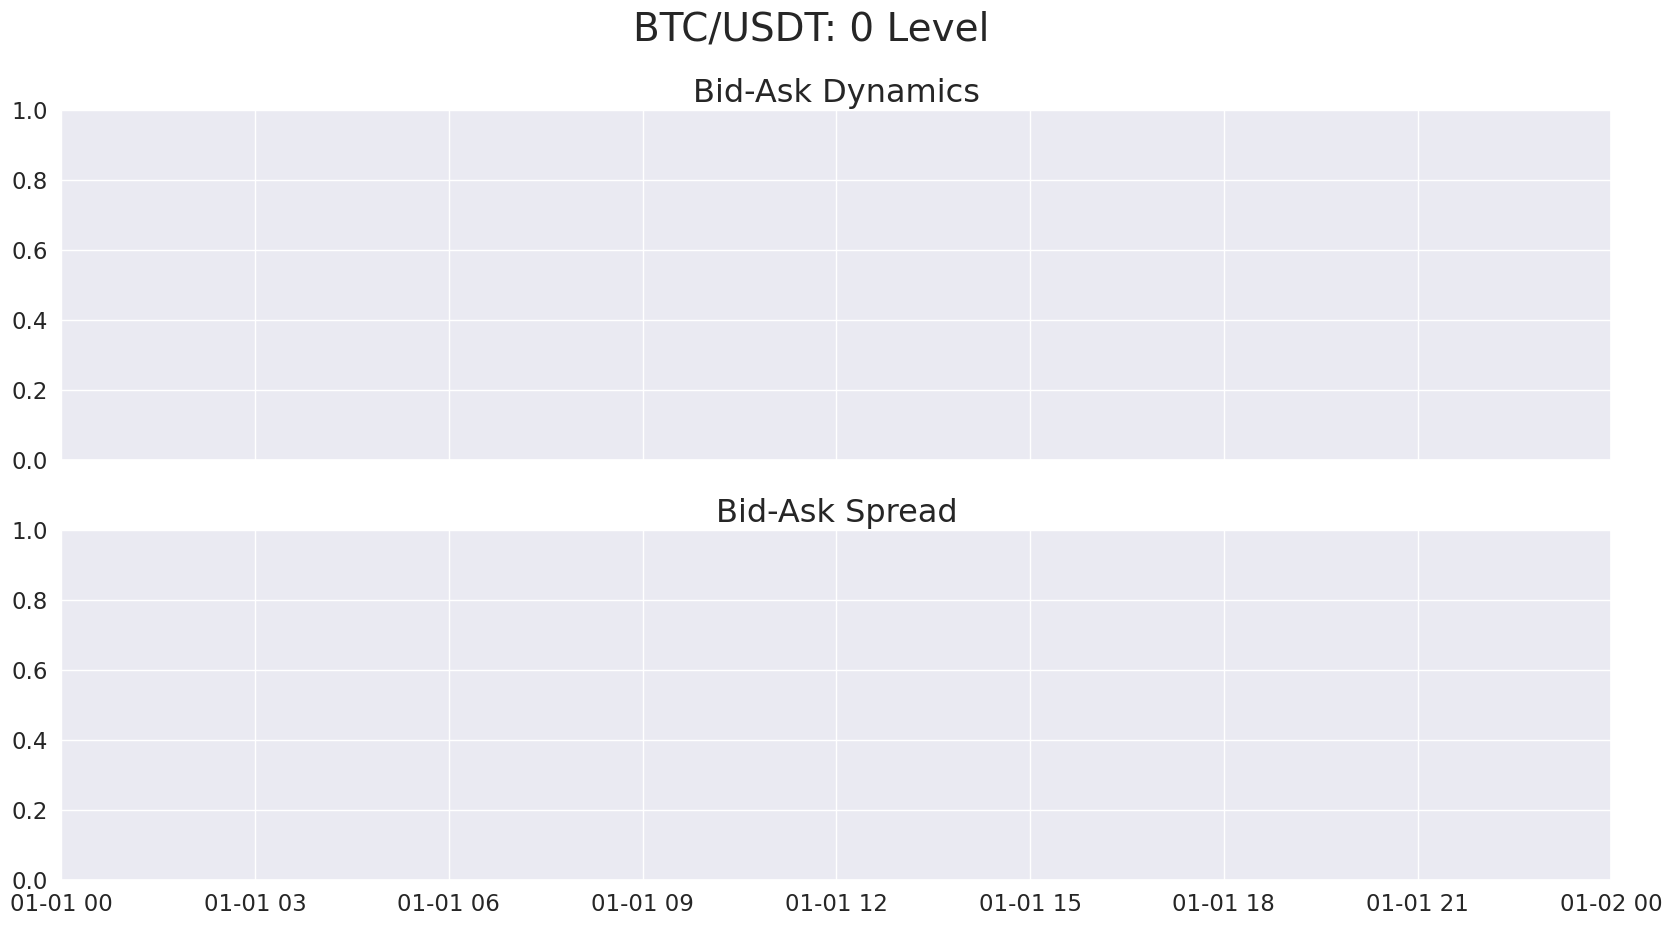

In [78]:
vizualize_level_by_time(btc_lobs_df, 0, 'BTC/USDT')

In [ ]:
(btc_lobs_df.spread_0 / ((btc_lobs_df.bid_price_0 + btc_lobs_df.ask_price_0) / 2)).describe()

In [ ]:
def vizualize_trades(trades_df, title, number_of_ticks=None, interval='60s'):
    trades_TS = pd.Series(trades_df[:number_of_ticks].price.values,
                          index=trades_df[:number_of_ticks].exchange_ts)
    trades_mean = trades_TS.resample(interval).mean()
    
    plt.figure(figsize=(15,5))
    sns.lineplot(data=trades_mean)

    plt.title(title, fontsize=23)
    plt.xlabel('Time', fontsize=19)
    plt.ylabel('USDT', fontsize=19)

    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
#     plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    for label in plt.gca().get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')

In [ ]:
vizualize_trades(btc_trades_df, title='BTC/USDT Trading Price')

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(15, 10))
sns.boxplot(y='size', x='aggro_side', data=btc_trades_df, ax=axes[0])
axes[0].set_title('BTC')
axes[0].set_xlabel(None)
plt.suptitle('Trade Volume Boxplots', fontsize=22);

In [ ]:
btc_trades_df['usdt_volume'] = btc_trades_df['size'] * btc_trades_df['price']

In [ ]:
btc_trades_df[['usdt_volume', 'size']].describe(percentiles=[0.05, 0.95])

In [ ]:
btc_trades_df[btc_trades_df['usdt_volume'] == 0]

In [ ]:
btc_trades_df = btc_trades_df[btc_trades_df.price != 0]

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(15,12))

btc_trades_df.hist(column='size', bins=20, ax=axes[0])
#eth_trades_df.hist(column='size', bins=20, ax=axes[1])

plt.suptitle("Trades Distribution", fontsize=22)
axes[0].set_title('BTC')
axes[0].set_xlabel('Volume BTC')
axes[0].set_ylabel('Count')

#axes[1].set_title('ETH')
#axes[1].set_xlabel('Volume ETH')
#axes[1].set_ylabel('Count');

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(15,12))

btc_trades_df[btc_trades_df['size'] <= 
              btc_trades_df['size'].quantile(0.99)].hist(column='size', bins=20, ax=axes[0])
#eth_trades_df[eth_trades_df['size'] <= 
#              eth_trades_df['size'].quantile(0.99)].hist(column='size', bins=20, ax=axes[1])

plt.suptitle("Trades Distribution", fontsize=22)
axes[0].set_title('BTC')
axes[0].set_xlabel('Volume BTC')
axes[0].set_ylabel('Count')

#axes[1].set_title('ETH')
#axes[1].set_xlabel('Volume ETH')
#axes[1].set_ylabel('Count');

In [ ]:
ax_0 = btc_trades_df[btc_trades_df['size'] <= 
              btc_trades_df['size'].quantile(0.99)].hist(column='size', by='aggro_side',
                                                         sharex=True, sharey=True, bins=20, figsize=(15,5))
#ax_1 = eth_trades_df[eth_trades_df['size'] <= 
#              eth_trades_df['size'].quantile(0.99)].hist(column='size', by='aggro_side',
#                                                         sharex=True, sharey=True, bins=20, figsize=(15,5))

for ax in ax_0.flatten():
    ax.set_xlabel("Volume BTC")
    ax.set_ylabel("Count")
    
#for ax in ax_1.flatten():
#    ax.set_xlabel("Volume ETH")
#    ax.set_ylabel("Count")

In [ ]:
btc_bid_cum_vol = btc_lobs_df[[f'bid_vol_{i}' for i in range(5)]].cumsum(axis=1)
btc_ask_cum_vol = btc_lobs_df[[f'ask_vol_{i}' for i in range(5)]].cumsum(axis=1)
btc_cum_vol_df = pd.concat([btc_bid_cum_vol, btc_ask_cum_vol], axis=1)
btc_cum_vol_df.insert(0, column='exhange_ts', value=btc_lobs_df['exchange_ts'].values)
btc_cum_vol_df.set_index('exhange_ts', inplace=True)
